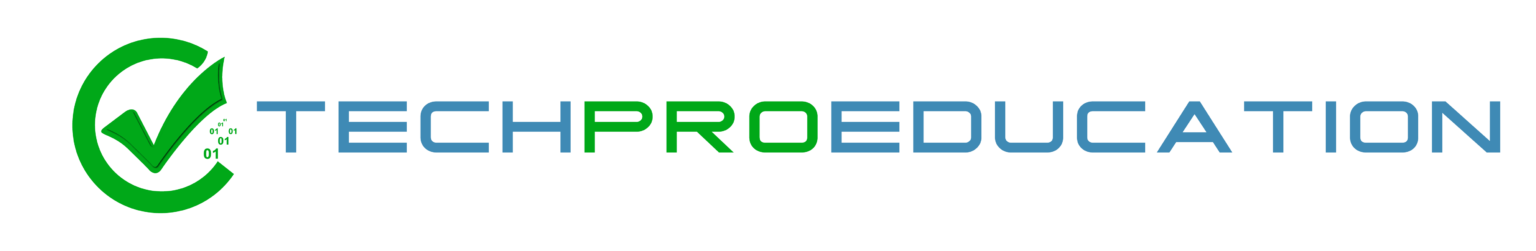

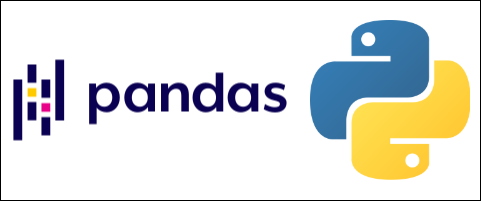

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Combining DataFrames

**Difference between merge, join, and concatenate;**

[Source01](https://realpython.com/pandas-merge-join-and-concat/), 
[Source02](https://studymachinelearning.com/difference-between-merge-join-and-concatenate/abs), 
[Source03](https://www.educba.com/pandas-merge-vs-join/),
[Source04](https://pandas.pydata.org/docs/user_guide/merging.html), 
[Source05](https://stackoverflow.com/questions/38256104/differences-between-merge-and-concat-in-pandas)

**append() ve concat()** ile dikey birleştirme yapabiliriz.

**concat(), join() ve merge()** ile yatay birleştirme yapabiliriz.

**append() ve concat()** ile aynı anda iki veya ikiden fazla dataframe i birleştirebiliriz.

**append() ve concat()** da ortak sütun olması gerekmez.

**concat()** ile hem satır hem de sütun bazlı birleştirme yapabiliriz. Yani "axis" sadece concat() de var.

**join()** de aynı anda iki veya daha fazla dataframe i birleştirebiliriz ancak aynı sütun isimleri varsa en fazla iki df birleştirebiliriz.

**merge()** ile aynı anda iki dataframe i birleştirebiliriz.

**merge()** ile birleştirme işlemimizi ortak sütun üzerinden yapıyoruz.

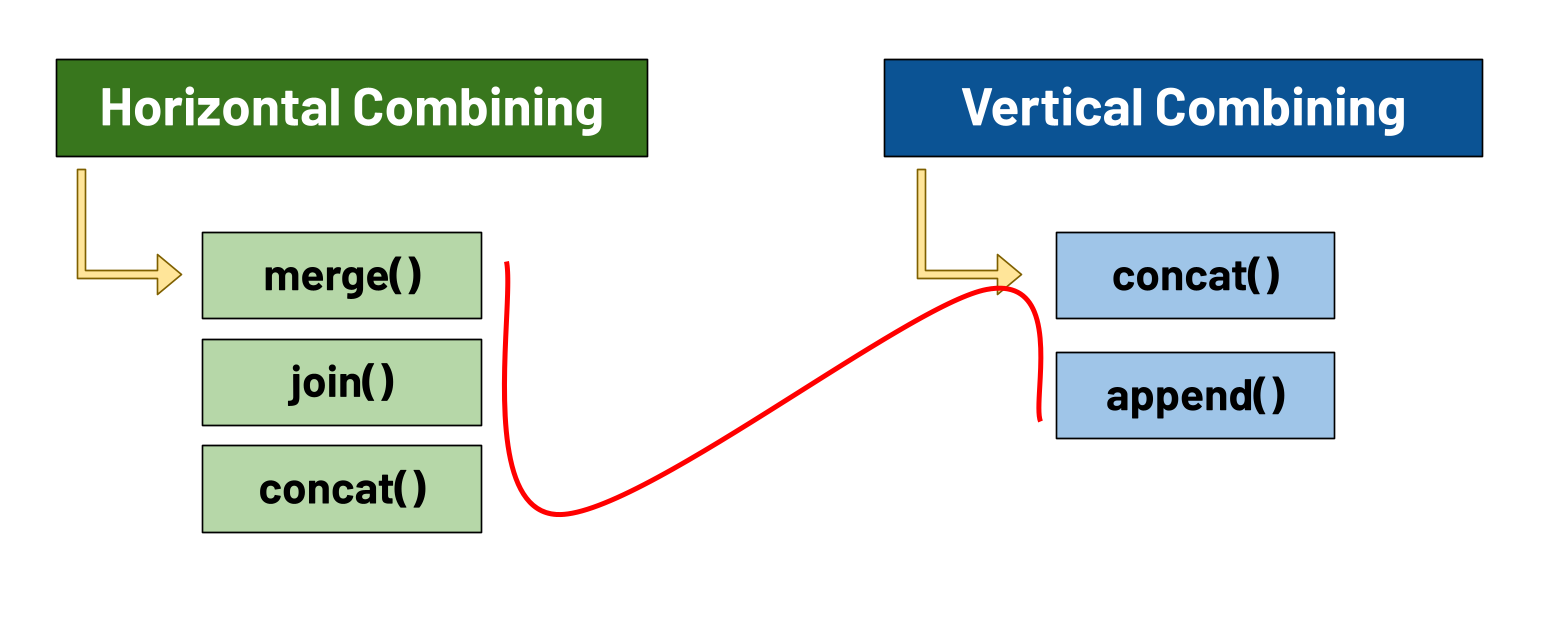

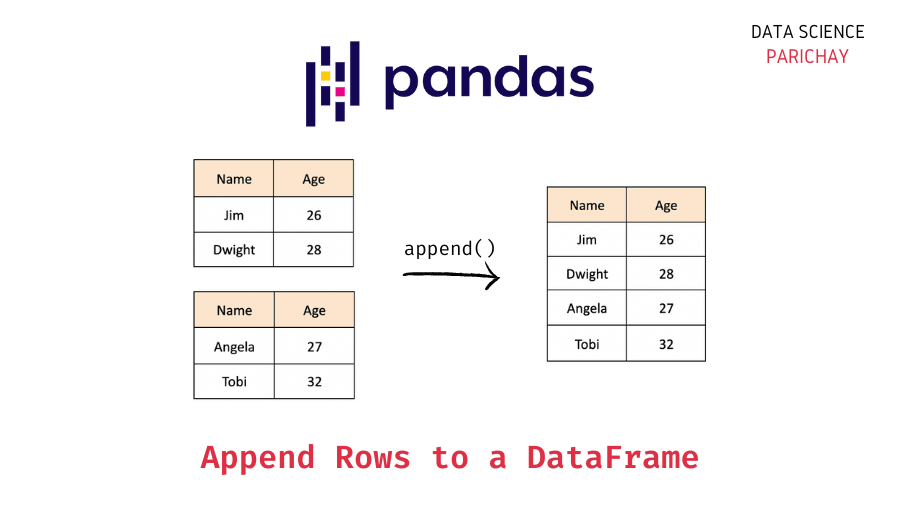

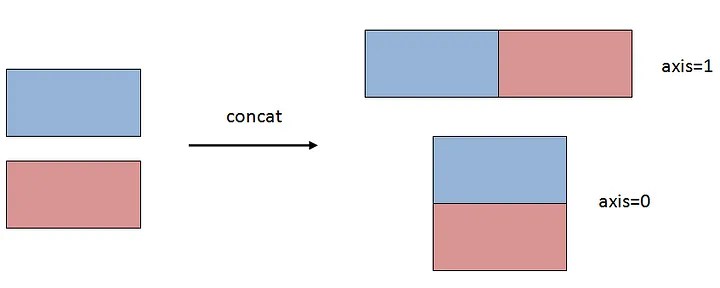

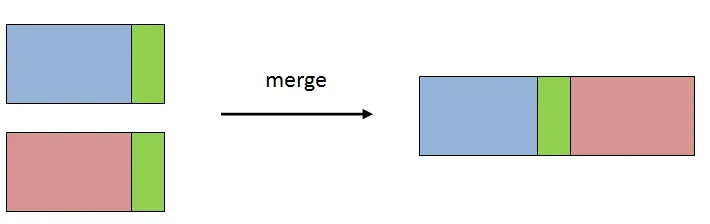

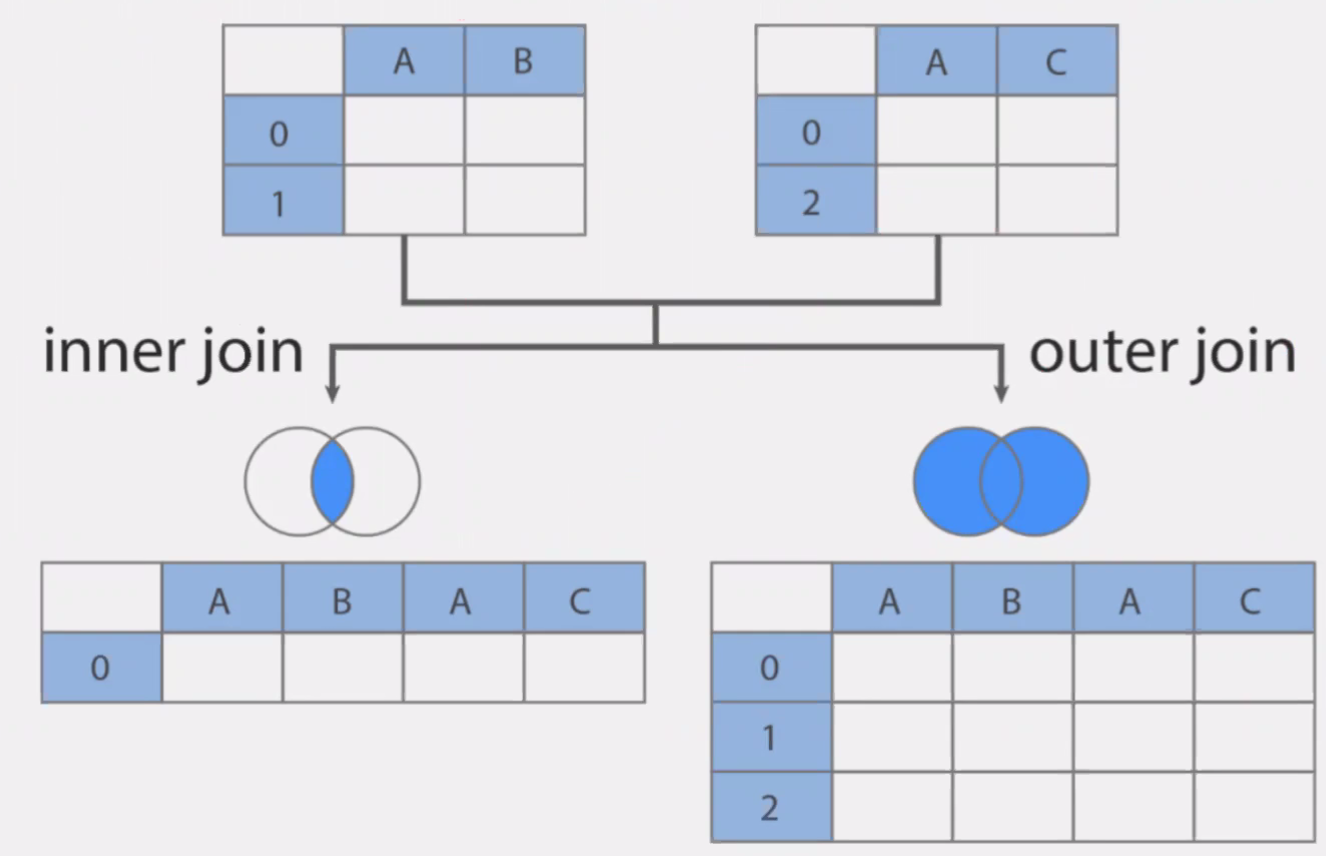

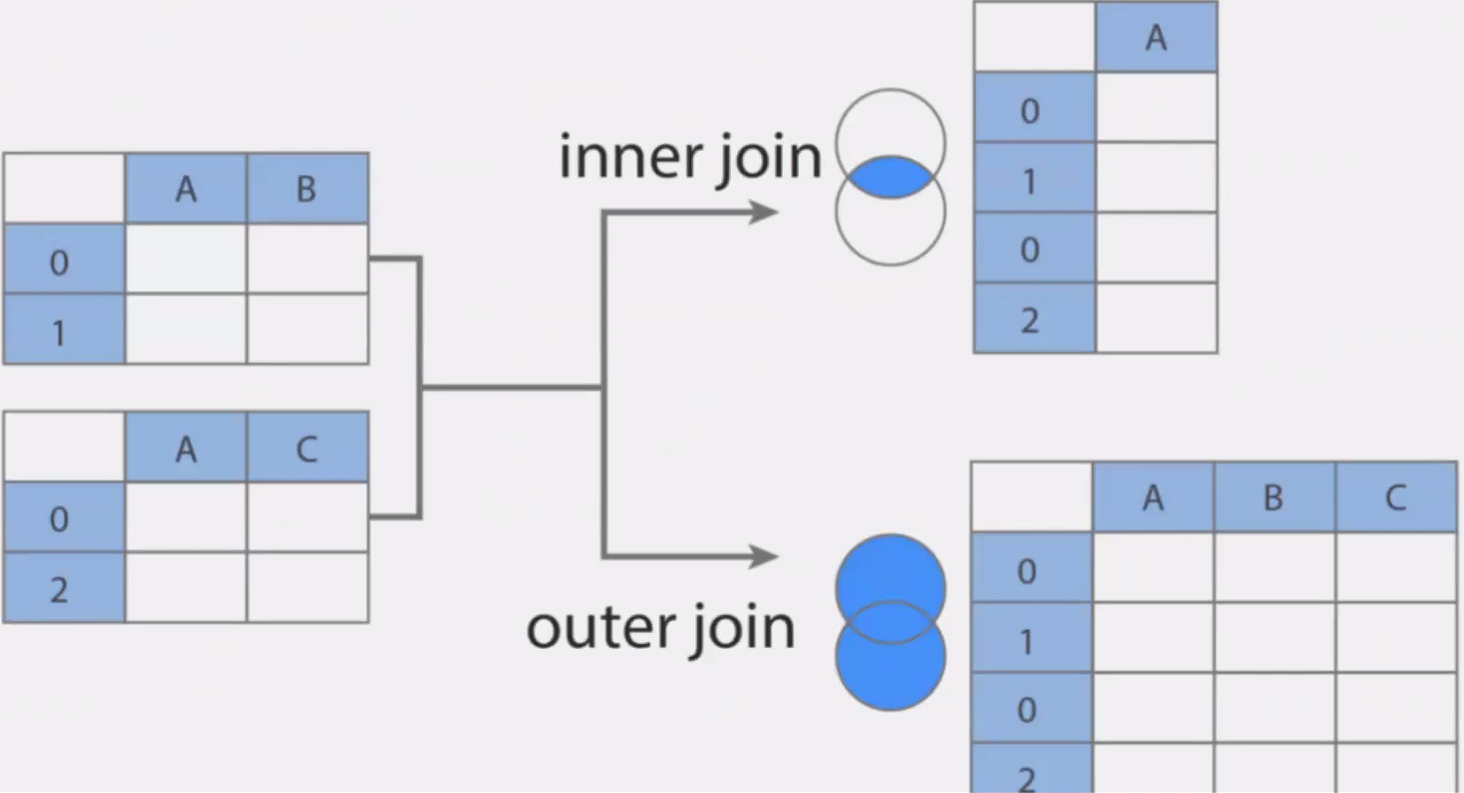

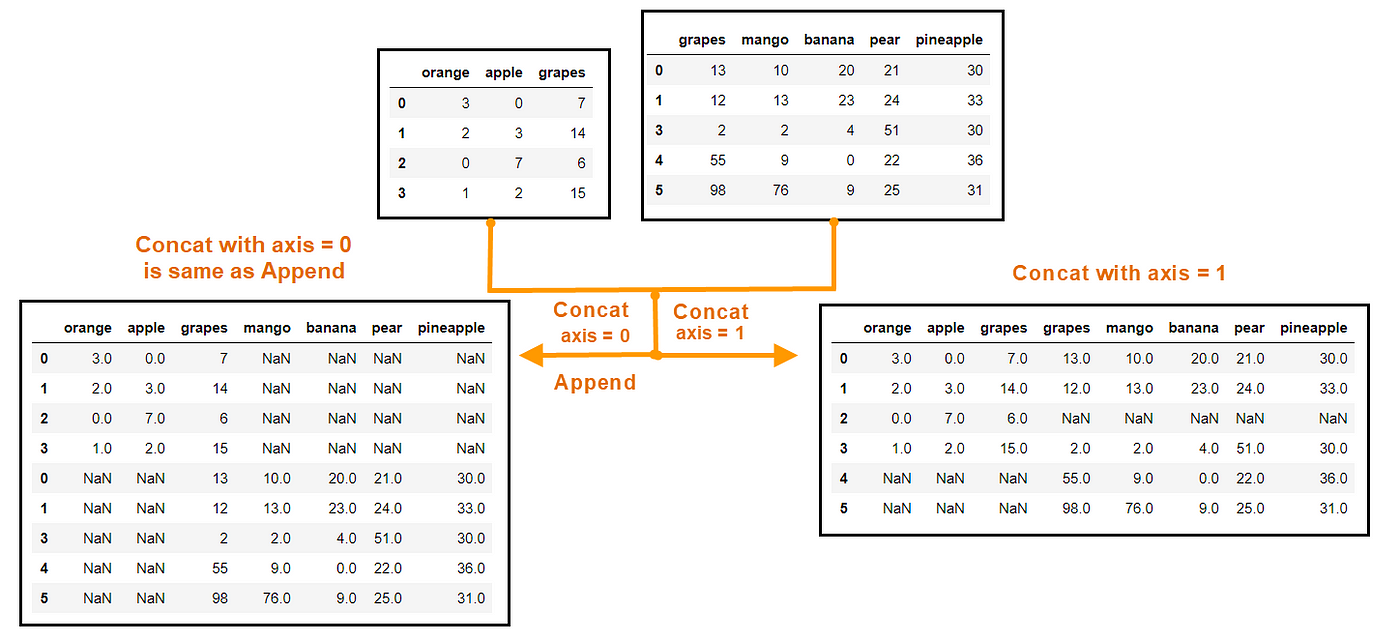

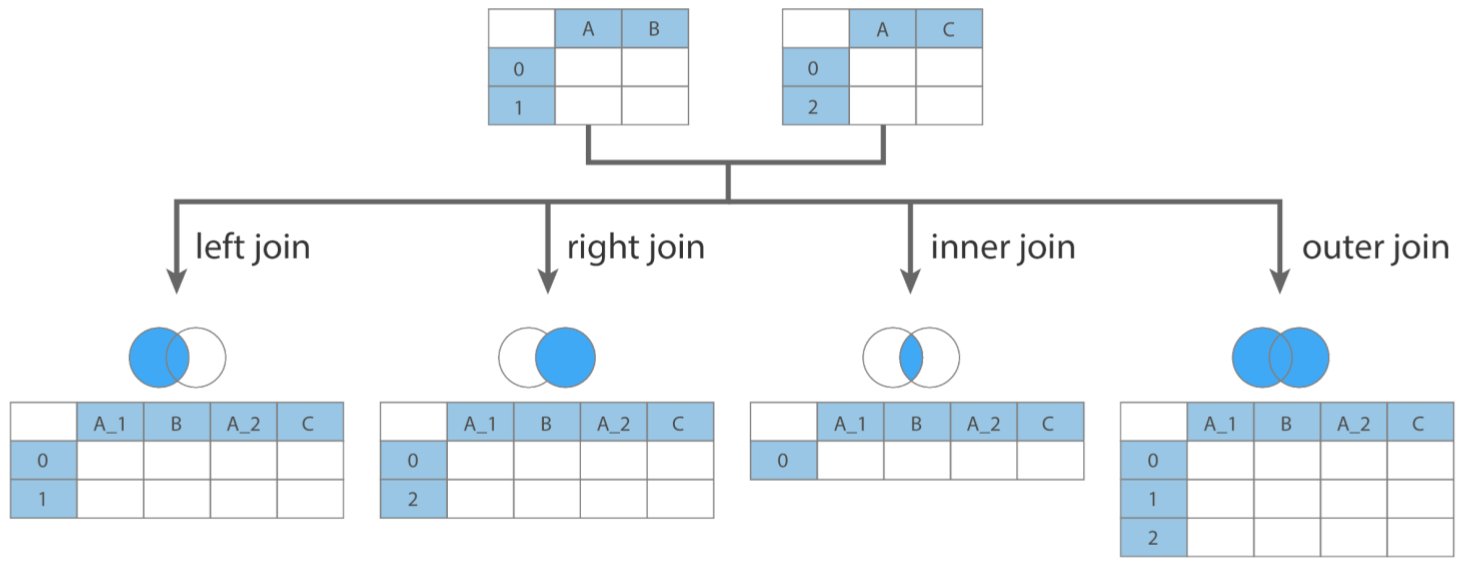

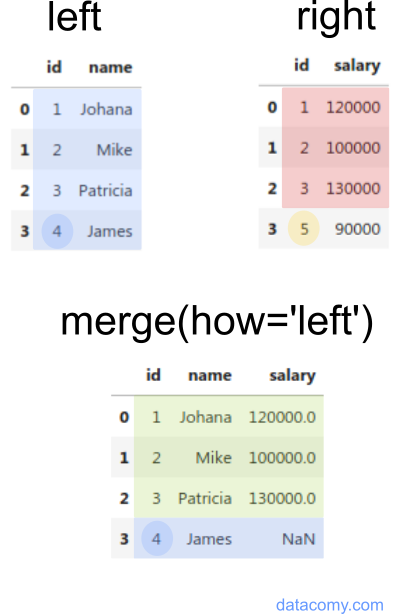

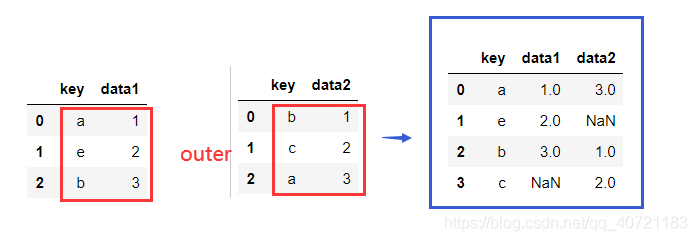

In [2]:
one = pd.DataFrame({
   'name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
   'subject_id':['sub1','sub2','sub4','sub6','sub5'],
   'marks_scored':[98,90,87,69,78]},
   index=[1,2,3,4,5])

two = pd.DataFrame({
   'name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
   'subject_id':['sub2','sub4','sub3','sub6','sub5'],
   'marks_scored':[89,80,79,97,88]},
   index=[1,2,3,4,5])

## append()

append() fonksiyonu, iki veri kümesini birleştirmek için kullanılan en temel yöntemdir.

[Source 01](https://pandas.pydata.org/pandas-docs/version/1.3/reference/api/pandas.DataFrame.append.html), 
[Source 02](https://www.geeksforgeeks.org/python-pandas-dataframe-append/), 
[Source 03](https://www.skytowner.com/explore/pandas_dataframe_append_method)

In [3]:
one

,name,subject_id,marks_scored
1,Alex,sub1,98
2,Amy,sub2,90
3,Allen,sub4,87
4,Alice,sub6,69
5,Ayoung,sub5,78


In [4]:
two

,name,subject_id,marks_scored
1,Billy,sub2,89
2,Brian,sub4,80
3,Bran,sub3,79
4,Bryce,sub6,97
5,Betty,sub5,88


In [5]:
one.append(two)

,name,subject_id,marks_scored
1,Alex,sub1,98
2,Amy,sub2,90
3,Allen,sub4,87
4,Alice,sub6,69
5,Ayoung,sub5,78
1,Billy,sub2,89
2,Brian,sub4,80
3,Bran,sub3,79
4,Bryce,sub6,97
5,Betty,sub5,88


In [6]:
one.append(two, ignore_index=True)

,name,subject_id,marks_scored
0,Alex,sub1,98
1,Amy,sub2,90
2,Allen,sub4,87
3,Alice,sub6,69
4,Ayoung,sub5,78
5,Billy,sub2,89
6,Brian,sub4,80
7,Bran,sub3,79
8,Bryce,sub6,97
9,Betty,sub5,88


## concat()

Farklı veri kümelerini aynı veri kümesinde bir araya getirmek veya veri kümesine yeni sütunlar veya satırlar eklemek için kullanılabilir.

[Source 01](https://pandas.pydata.org/docs/reference/api/pandas.concat.html), 
[Source 02](https://sparkbyexamples.com/pandas/pandas-concat-dataframes-explained/), 
[Source 03](https://practicaldatascience.co.uk/data-science/how-to-use-pandas-concat-to-concatenate-dataframes) & 
[Source 04](https://www.tutorialspoint.com/python_pandas/python_pandas_concatenation.htm)

In [9]:
pd.concat([one, two])

,name,subject_id,marks_scored
1,Alex,sub1,98
2,Amy,sub2,90
3,Allen,sub4,87
4,Alice,sub6,69
5,Ayoung,sub5,78
1,Billy,sub2,89
2,Brian,sub4,80
3,Bran,sub3,79
4,Bryce,sub6,97
5,Betty,sub5,88


In [10]:
pd.concat([one, two], ignore_index=True)

,name,subject_id,marks_scored
0,Alex,sub1,98
1,Amy,sub2,90
2,Allen,sub4,87
3,Alice,sub6,69
4,Ayoung,sub5,78
5,Billy,sub2,89
6,Brian,sub4,80
7,Bran,sub3,79
8,Bryce,sub6,97
9,Betty,sub5,88


In [11]:
pd.concat([one, two], ignore_index=True, axis=1)

,0,1,2,3,4,5
1,Alex,sub1,98,Billy,sub2,89
2,Amy,sub2,90,Brian,sub4,80
3,Allen,sub4,87,Bran,sub3,79
4,Alice,sub6,69,Bryce,sub6,97
5,Ayoung,sub5,78,Betty,sub5,88


In [12]:
pd.concat([one.iloc[ : , :2 ], two.iloc[:, 1:]])

,name,subject_id,marks_scored
1,Alex,sub1,NaN
2,Amy,sub2,NaN
3,Allen,sub4,NaN
4,Alice,sub6,NaN
5,Ayoung,sub5,NaN
1,NaN,sub2,89.0
2,NaN,sub4,80.0
3,NaN,sub3,79.0
4,NaN,sub6,97.0
5,NaN,sub5,88.0


## merge()

merge(), veri kümesindeki eksik veya farklı değerleri tamamlamak veya farklı veri kaynaklarını bir araya getirmek için sıkça kullanılır.

[Source 01](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html), 
[Source 02](https://www.w3schools.com/python/pandas/ref_df_merge.asp), 
[Source 03](https://www.digitalocean.com/community/tutorials/pandas-merge-two-dataframe),
[Source 04](https://towardsdatascience.com/why-and-how-to-use-merge-with-pandas-in-python-548600f7e738)

In [13]:
x = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                     'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']})

y = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})

In [14]:
x

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2


In [15]:
y

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [17]:
pd.merge(x, y, how="inner", on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


In [18]:
pd.merge(x, y, how="outer")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,NaN,NaN,C3,D3


In [19]:
pd.concat([x,y])

,key,A,B,C,D
0,K0,A0,B0,NaN,NaN
1,K1,A1,B1,NaN,NaN
2,K2,A2,B2,NaN,NaN
0,K0,NaN,NaN,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,NaN,NaN,C2,D2
3,K3,NaN,NaN,C3,D3


In [20]:
pd.merge(x, y, how="left")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


In [21]:
pd.merge(x, y, how="right")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,NaN,NaN,C3,D3


In [22]:
df1 = pd.DataFrame({'lkey': ['x', 'y', 'z', 'x'],
                    'lvalue': [2, 3, 5, 7]})

df2 = pd.DataFrame({'rkey': ['a', 'x', 'z', 'b'],
                    'rvalue': [7, 8, 9, 10]})

In [23]:
df1

,lkey,lvalue
0,x,2
1,y,3
2,z,5
3,x,7


In [24]:
df2

,rkey,rvalue
0,a,7
1,x,8
2,z,9
3,b,10


In [25]:
pd.merge(df1, df2, left_on="lkey", right_on="rkey", how="inner")

,lkey,lvalue,rkey,rvalue
0,x,2,x,8
1,x,7,x,8
2,z,5,z,9


In [26]:
pd.merge(df1, df2, left_on="lkey", right_on="rkey", how="outer")

,lkey,lvalue,rkey,rvalue
0,x,2.0,x,8.0
1,x,7.0,x,8.0
2,y,3.0,NaN,NaN
3,z,5.0,z,9.0
4,NaN,NaN,a,7.0
5,NaN,NaN,b,10.0


In [29]:
df1

,lkey,lvalue
0,x,2
1,y,3
2,z,5
3,x,7


In [30]:
df2

,rkey,rvalue
0,a,7
1,x,8
2,z,9
3,b,10


## join()

Daha çok SQL tabanlı veri işleme işlemlerinde kullanılır. 

[Source 01](https://sparkbyexamples.com/pandas/pandas-join-explained-with-examples/), 
[Source 02](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html), 
[Source 03](https://www.w3schools.com/python/pandas/ref_df_join.asp)

In [31]:
df3 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index = ['K0', 'K1', 'K2']) 

df4 = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index = ['K0', 'K2', 'K3'])

In [32]:
df3

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [33]:
df4

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [34]:
df3.join(df4)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [35]:
df3.join(df4, how="right")

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [36]:
df3.join(df4, how="outer")

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [37]:
df3.join(df4, how="inner")

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


In [38]:
df4.join(df3)

,C,D,A,B
K0,C0,D0,A0,B0
K2,C2,D2,A2,B2
K3,C3,D3,NaN,NaN


In [39]:
df5 = pd.DataFrame({'key': ['K0', 'K2', 'K3', 'K4', 'K5', 'K6'],
                   'X': ['X0', 'X2', 'X3', 'X4', 'X5', 'X6']})

df6 = pd.DataFrame({'key': ['K0', 'K2', 'K3'],
                      'Y': ['Y0', 'Y2', 'Y3']})

In [40]:
df5

,key,X
0,K0,X0
1,K2,X2
2,K3,X3
3,K4,X4
4,K5,X5
5,K6,X6


In [41]:
df6

,key,Y
0,K0,Y0
1,K2,Y2
2,K3,Y3


In [42]:
# df5.join(df6)

ValueError: columns overlap but no suffix specified: Index(['key'], dtype='object')

In [43]:
df5.join(df6, lsuffix= "_left", rsuffix="_lright")

,key_left,X,key_lright,Y
0,K0,X0,K0,Y0
1,K2,X2,K2,Y2
2,K3,X3,K3,Y3
3,K4,X4,NaN,NaN
4,K5,X5,NaN,NaN
5,K6,X6,NaN,NaN


In [44]:
df5.set_index("key")

,X
key,
K0,X0
K2,X2
K3,X3
K4,X4
K5,X5
K6,X6


In [45]:
df6.set_index("key")

,Y
key,
K0,Y0
K2,Y2
K3,Y3


In [46]:
df5.set_index("key").join(df6.set_index("key"))

,X,Y
key,,
K0,X0,Y0
K2,X2,Y2
K3,X3,Y3
K4,X4,NaN
K5,X5,NaN
K6,X6,NaN


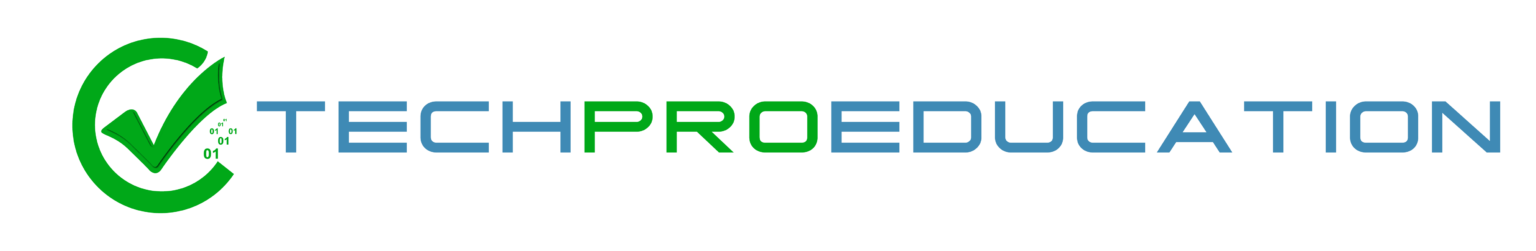